In [1]:
# When you're here, successfully launched Jupyter Notebook on a GPU node on Biowulf,
# you're already almost there for this quiz :)

In [2]:
# Problem 1: Let's make sure you are on a GPU node (6 points)
# Using a bash command to display GPU info, enter 1) how many GPUs you got,
# 2) what type of GPU, 3) how much memory you have in each GPU
!nvidia-smi

Mon Mar 11 15:22:09 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.72       Driver Version: 410.72       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  Off  | 00000000:07:00.0  On |                    0 |
| N/A   38C    P0    39W / 300W |    270MiB / 32475MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  Off  | 00000000:08:00.0 Off |                    0 |
| N/A   38C    P0    39W / 300W |      0MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [3]:
# Problem 2: Using a bash command, show what type of OS (Operating System) you have (2 points)
# option 1:
!uname -a

Linux westford-dgx 4.4.0-139-generic #165-Ubuntu SMP Wed Oct 24 10:58:50 UTC 2018 x86_64 x86_64 x86_64 GNU/Linux


In [4]:
# option 2:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 16.04.5 LTS
Release:	16.04
Codename:	xenial


In [5]:
# Problem 3: Using Python command, change your working directory to where you have
# MNIST dataset (4 points)
import os
mnist_dir = '/raid/local_data/mnist_png/mnist_png/'
os.chdir(mnist_dir)
!ls

testing  training


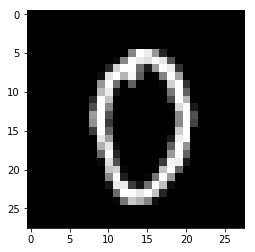

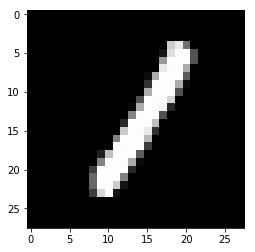

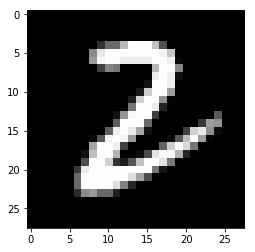

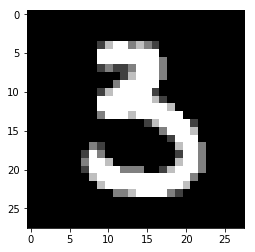

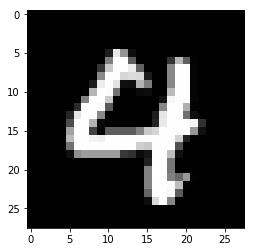

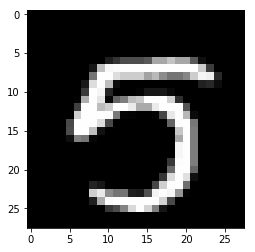

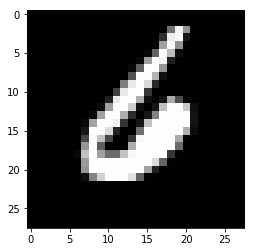

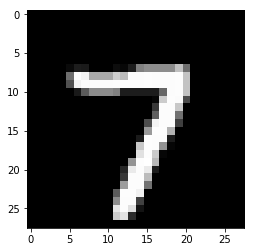

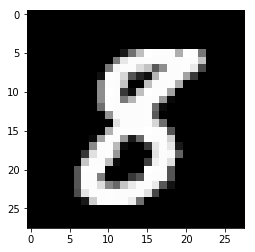

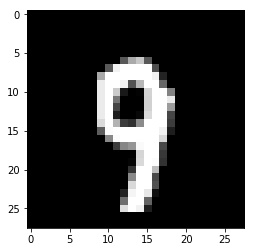

In [7]:
# Problem 4: Display random samples of digits in the MNIST dataset 0-9 (4 points)
import glob, random
import matplotlib.pyplot as plt
from skimage import io

for idx in range(10):
    digit_tr_dir = os.path.join(mnist_dir, 'training', str(idx))
    digits = glob.glob(os.path.join(digit_tr_dir, '*.png'))
    random_digit = digits[random.sample(range(len(digits)), 1)[0]]
    
    plt.figure()
    plt.imshow(io.imread(random_digit), cmap='gray')

1000 images found


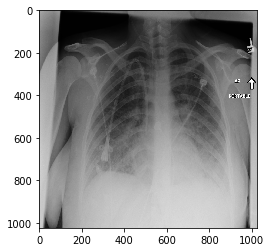

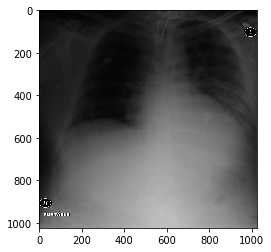

In [8]:
# Problem 5: Navigate to the chest x-ray dataset, display two random samples of images (4 points)
import sys, pydicom
sys.path.append(os.path.abspath(os.path.join(
    '/home/hshin/workspace/NIH-FAES-BIOF-399-Spring-2019//week-02')))

import image_bbox_loader
import box_utils

chestpnx_dir = '/raid/local_data/rsna_pneumonia_2018/'
stage_num = '1'
test_only_part = True

image_bbox_label_list = image_bbox_loader.load_image_bbox_label_list(chestpnx_dir,
                                                                     stage_num, test_only_part)

random.shuffle(image_bbox_label_list)

for idx, [imf, boxes, labels] in enumerate(image_bbox_label_list):
    img = pydicom.dcmread(imf).pixel_array
    
    plt.figure()
    plt.imshow(img, cmap='gray')
    
    if idx > 0:
        break

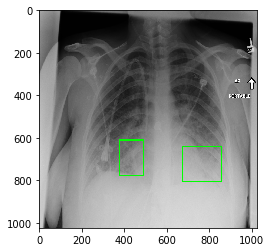

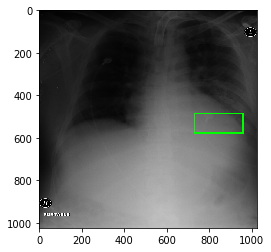

In [9]:
# Bonus problem: Display random two samples of images with pneumonia with bounding boxes
# (bonus 5 points)

from imgaug import augmenters as iaa
import imgaug as ia
import numpy as np

for idx, [imf, boxes, labels] in enumerate(image_bbox_label_list):
    img = pydicom.dcmread(imf).pixel_array
    img2 =  np.stack((img,)*3, axis=-1)
    
    for boxi_ in boxes: # batch_size=1
        
        boxi = box_utils.center_form_to_corner_form(
               box_utils.min_wh_form_to_center_form(boxi_)).numpy()
        
        bbi = ia.BoundingBox(x1=boxi[0],
                             x2=boxi[2],
                             y1=boxi[1],
                             y2=boxi[3])
        img2 = bbi.draw_on_image(img2, thickness=6)
    
    plt.figure()
    plt.imshow(img2)
    
    
    if idx > 0:
        break